In [2]:
import sys
sys.path.append('/home/ubuntu/workspace/einops')

In [10]:
# import utils

In [3]:
# Examples are given for numpy. This code also setups ipython/jupyter
# so that numpy arrays in the output are displayed as images
import numpy
from utils import display_np_arrays_as_images
display_np_arrays_as_images()

In [6]:
ims = numpy.load('../resources/test_images.npy', allow_pickle=False)
# There are 6 images of shape 96x96 with 3 color channels packed into tensor
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


In [12]:
ims[5].shape

(96, 96, 3)

In [10]:
from einops import rearrange, reduce, repeat

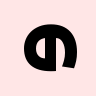

In [13]:
rearrange(ims[0], 'h w c -> w h c')

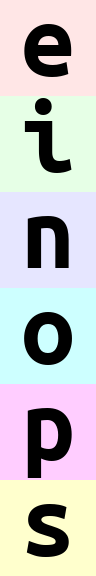

In [14]:
rearrange(ims, 'b h w c -> (b h) w c')

In [17]:
rearrange(ims, 'b h w c ->  h w (b c)')

TypeError: Cannot handle this data type: (1, 1, 18), |u1